In [1]:
import numpy as np

def PCA(X , num_components):
     
    #Step-1
    X_meaned = (X - np.mean(X , axis = 0)) / np.std(X)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar=False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
        
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, eigen_values, eigen_vectors

In [2]:
import pandas as pd

#read iris csv
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#prepare the data
x = data.iloc[:,1:5]
 
#prepare the target
target = data.iloc[:,5]
 
#Applying it to PCA function for k = 2
mat_reduced, eig_val, eig_vec = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

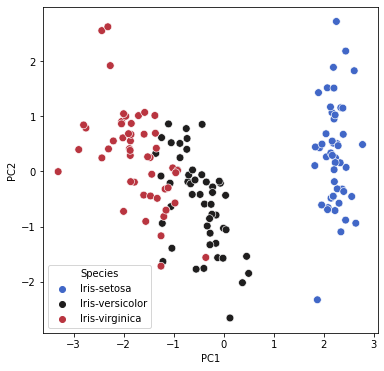

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2', hue = target, s = 60 , palette= 'icefire')

In [5]:
#Applying it to PCA function for k = 3
mat_reduced2, eig_val2, eig_vec2 = PCA(x , 3)

#Creating a Pandas DataFrame of reduced Dataset
new_df = pd.DataFrame(mat_reduced2 , columns = ['PC1','PC2','PC3'])

#Concat it with target variable to create a complete Dataset
new_df = pd.concat([new_df , pd.DataFrame(target)] , axis = 1)

<ipython-input-6-5ad5b03b38ec>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


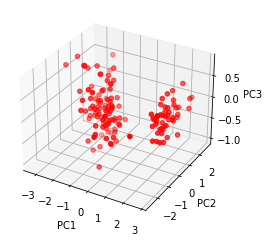

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')
ax.scatter(new_df['PC1'],  new_df['PC2'], new_df['PC3'], c='r', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [7]:
total = sum(eig_val)
var_exp = [(i / total)*100 for i in sorted(eig_val, reverse=True)]

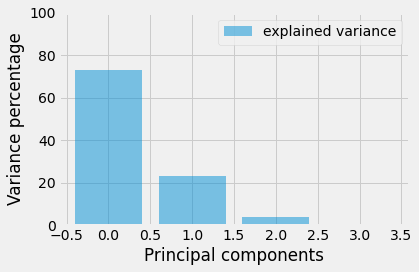

In [8]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='explained variance')
    plt.ylabel('Variance percentage')
    plt.xlabel('Principal components')
    plt.ylim(0,100)
    plt.legend(loc='best')
    plt.tight_layout()

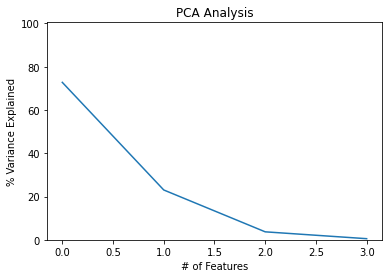

In [9]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var_exp)

[0.92461621 0.05301557 0.01718514 0.00518309]


[]

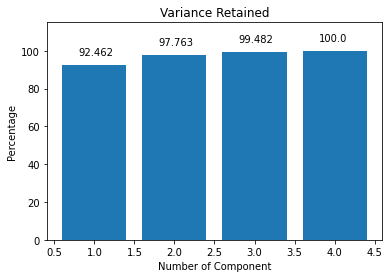

In [10]:
import sklearn.decomposition as sk
covar_matrix = sk.PCA(n_components=4)
covar_matrix.fit(x)
print(covar_matrix.explained_variance_ratio_)
var_retained = 100 * covar_matrix.explained_variance_ratio_.cumsum()

xloc = [1,2,3,4]
plt.bar(xloc, var_retained)
# Text on the top of each bar
for i in range(4):
    plt.text(xloc[i]-0.20, var_retained[i]+5, s=round(var_retained[i], 3), size=10)
plt.ylim(0,115)
plt.title('Variance Retained')
plt.xlabel('Number of Component')
plt.ylabel('Percentage')
plt.plot()

In [11]:
Encoding = [['Iris-virginica', 0.0], ['Iris-versicolor', 0.5], ['Iris-setosa', 1.0]]

def Encode(y):
    temp = np.empty(len(y), dtype='float64')
    for i in range(len(y)):
        if   (y[i] == Encoding[0][0]):  temp[i] = Encoding[0][1]
        elif (y[i] == Encoding[1][0]):  temp[i] = Encoding[1][1]
        else:                           temp[i] = Encoding[2][1]
    return temp
            
#decoding
def Decode(y):
    temp = np.empty(len(y), dtype='O')
    for i in range(len(y)):
        if   (y[i] == Encoding[0][1]):  temp[i] = Encoding[0][0]
        elif (y[i] == Encoding[1][1]):  temp[i] = Encoding[1][0]
        else:                           temp[i] = Encoding[2][0]
    return temp

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
def BPNN(x, y, initWeights, initBias, epochs, lrate=0.005):
    # n atau banyaknya iterasi untuk gradient descent
    weights = initWeights
    bias = initBias
    for epoch in range(epochs):

        # menggunakan dot product untuk menghitung kalkulasi bobot
        wSum = np.dot(x, weights) + bias
        res = sigmoid(wSum)

        # hitung error dari prediksi menggunakan fungsi aktivasi
        err = res - y
        errSum = np.square(err).mean()

        # metode gradient descent untuk memperkecil error
        der1 = err
        der2 = der_sigmoid(res)
        derivative = der1 * der2

        transposed_x = x.T
        final_derivative = np.dot(transposed_x, derivative)

        # perbarui weights dan bias berdasarkan turunan fungsi sigmoid
        weights = weights - lrate * final_derivative

        for i in derivative:
            bias = bias - lrate * i
    
    return weights, bias

In [14]:
# pembulatan ke nilai terdekat kelipatan 0.5
def roundhalf(num):
    return np.round(num * 2) / 2
# prediksi akan menebak nilai yang diberikan oleh x menggunakan gradient
# nilai akan dibulatkan kepada 0.5 terdekat
# ini untuk menentukan kategori dimana:
# 0.0 virginica, 0.5 = versicolor, 1 = setosa
def predict(x, weights, bias):
    pred = np.dot(x, weights) + bias
    res = sigmoid(pred)
    res = roundhalf(res)
    return res

In [15]:
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from random import uniform

def Routine(x, y, reduction):
    
    if (reduction < x.shape[1]):
        xReduced, eig_val, eig_vec = PCA(x , reduction)
        x = xReduced
    
    y = Encode(y)
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)
    
    # inisial gradien dengan nilai random -0.5 - 0.5
    initWeights = [uniform(-0.5, 0.5) for i in range(reduction)]
    initBias = uniform(-0.5, 0.5)
    
    weights, bias = BPNN(xTrain, yTrain, initWeights, initBias, 100)
    yPred = predict(xTest, weights, bias)
    
    acc = np.sum(yPred == yTest) / len(yTest) * 100.0
    return acc

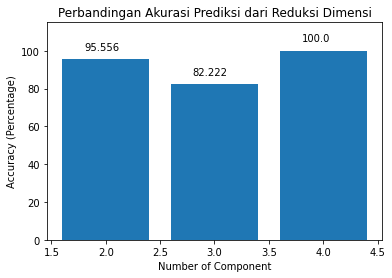

In [16]:
acc = [None] * 3
num_component = [4, 3, 2]
acc[0] = Routine(x, target, num_component[0])
acc[1] = Routine(x, target, num_component[1])
acc[2] = Routine(x, target, num_component[2])

plt.bar(num_component, acc)
# Text on the top of each bar
for i in range(3):
    plt.text(num_component[i]-0.20, acc[i]+5, s=round(acc[i], 3), size=10)
plt.title('Perbandingan Akurasi Prediksi dari Reduksi Dimensi')
plt.ylim(0, 115)
plt.xlabel('Number of Component')
plt.ylabel('Accuracy (Percentage)')
plt.show()